# Crude Oil Viscosity Prediction using Random Forest
**Author:** Ade Anggi Naluriawan Santoso 
**Objective:** Build a Machine Learning model to predict oil viscosity from Temperature, Pressure, and API.

In this notebook, we will:
1.  Explore the dataset physically (EDA).
2.  Train a Random Forest Regressor.
3.  Evaluate the model's accuracy.
4.  Analyze Feature Importance (Physics check).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Styling
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

## 1. Load and Inspect Data
We load the dataset `viscosity_data.csv`.
* **Target:** `Viscosity_cP`
* **Features:** `Temperature_F`, `Pressure_Psi`, `API_Gravity`

In [2]:
df = pd.read_csv('viscosity_data.csv')
df.head()

,Well_ID,Temperature_F,Pressure_Psi,API_Gravity,Viscosity_cP
0,W-001,156.2,3745,20.6,10.33
1,W-002,242.6,3340,31.3,2.05
2,W-003,209.8,2774,41.2,0.93
3,W-004,189.8,4034,37.0,1.45
4,W-005,123.4,3712,39.2,3.79


## 2. Exploratory Data Analysis (EDA)
Before modeling, we must verify that the data makes physical sense.
* **Expectation:** As Temperature increases, Viscosity should decrease.
* **Expectation:** As API increases (lighter oil), Viscosity should decrease.

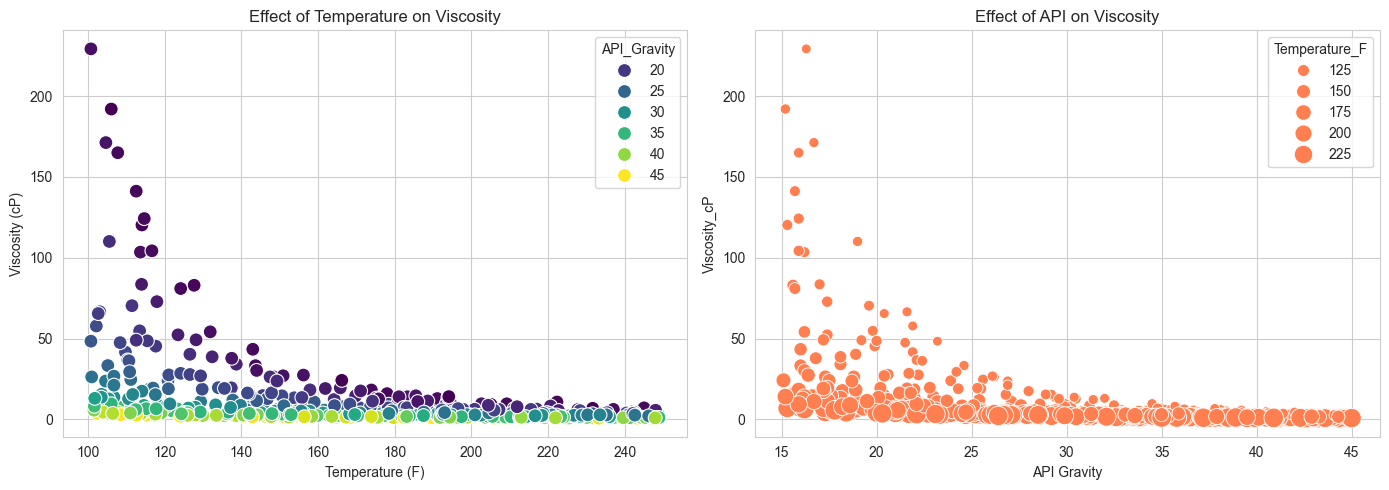

In [3]:
plt.figure(figsize=(14, 5))

# Plot 1: Temperature vs Viscosity
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Temperature_F', y='Viscosity_cP', hue='API_Gravity', palette='viridis', s=100)
plt.title('Effect of Temperature on Viscosity')
plt.xlabel('Temperature (F)')
plt.ylabel('Viscosity (cP)')

# Plot 2: API vs Viscosity
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='API_Gravity', y='Viscosity_cP', size='Temperature_F', sizes=(50, 200), color='coral')
plt.title('Effect of API on Viscosity')
plt.xlabel('API Gravity')

plt.tight_layout()
plt.show()

## 3. Data Preprocessing
We drop non-numerical identifiers (`Well_ID`) and split the data into Training and Testing sets.
* **Test Size:** 20% of data is held back to validate the model on "unseen" wells.

In [4]:
# Define Features (X) and Target (y)
X = df[['Temperature_F', 'Pressure_Psi', 'API_Gravity']]
y = df['Viscosity_cP']

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")

Training Samples: 400
Testing Samples: 100


## 4. Model Building: Random Forest
We use a **Random Forest Regressor**.
* **Why Random Forest?** Viscosity relationships are non-linear (exponential decay). Linear regression often fails to capture the sharp drop in viscosity at low temperatures. Random Forest handles these non-linearities excellently.

In [5]:
# Initialize Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train Model
rf_model.fit(X_train, y_train)

print("Model Training Completed.")

Model Training Completed.


## 5. Model Evaluation
We test the model on the 20% of data it has never seen before.
* **MAE (Mean Absolute Error):** The average error in cP.
* **R2 Score:** How well the model explains the variance (closer to 1.0 is better).

In [6]:
# Predict on Test Set
y_pred = rf_model.predict(X_test)

# Calculate Metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f} cP")
print(f"R2 Score: {r2:.4f}")

Mean Absolute Error: 1.75 cP
R2 Score: 0.8530


## 6. Feature Importance
One criticism of ML is that it is a "Black Box". Feature importance helps us look inside.
We expect **Temperature** or **API** to be the most important drivers. If "Pressure" is the top driver, our data might be flawed or biased.

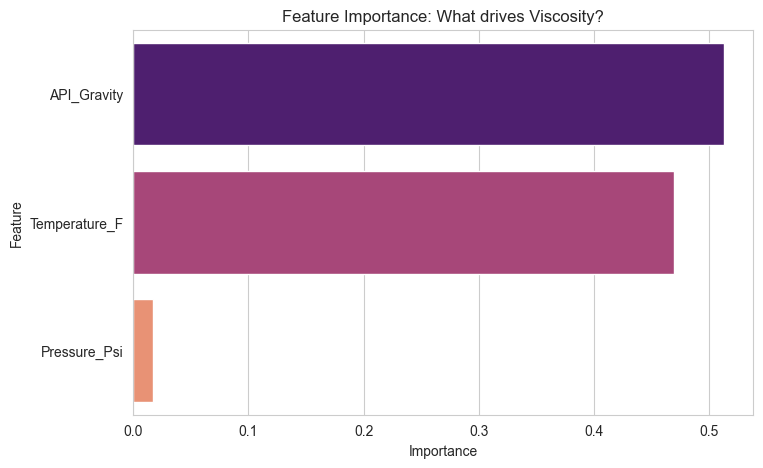

In [7]:
# Get importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Create DataFrame for plotting
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='magma')
plt.title('Feature Importance: What drives Viscosity?')
plt.show()

## 7. Prediction Visualization
Finally, let's plot Predicted vs Actual values. A straight line indicates a perfect model.

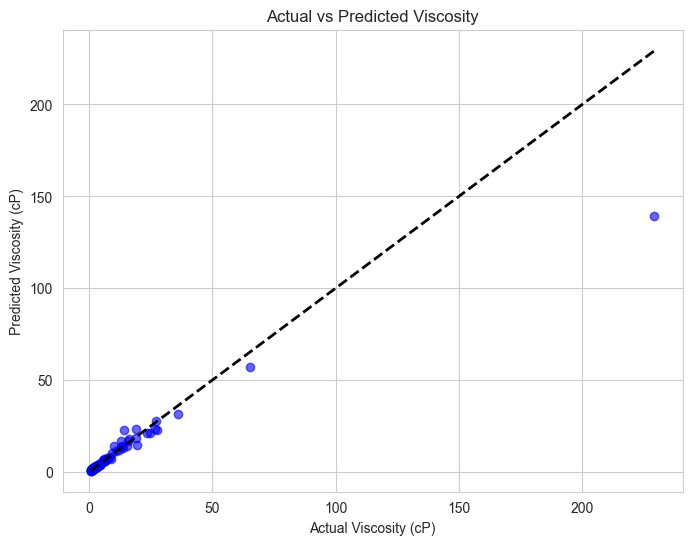

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) # Perfect match line
plt.xlabel('Actual Viscosity (cP)')
plt.ylabel('Predicted Viscosity (cP)')
plt.title('Actual vs Predicted Viscosity')
plt.grid(True)
plt.show()